# Data Science Cheatsheet

Python contains several packages and functions that make the process of data science a more enjoyable process than writing many of the functionalities from scratch. In this document, we will explore several of these methods.

## Data Science Workflow

Recall the data science workflow.

![Data Science Workflow](assets/data-science-workflow-final.jpg)

## Python packages

Python packages contain data structures and methods that people have written to perform repeated tasks. They can be added to the current Python notebook using the command `import package_name`. To import specific methods, use `from package_name import method_name`.

We will encounter several packages during the course of our studies. They will be added to this section as and when we encounter them.

`numpy` - This package provides two useful data structures, `matrix` and `array`. These data structures are primarily for grouping and working with numbers. Additionally, it provides several methods for these data structures to quickly operate on them.

`pandas` - This package contains a very useful data structure for data science `DataFrame`. It is essentially a table with named rows (indices) and columns, for those familiar with Excel. Each column can be a different data type - float, int, string, etc. The package provides high-performance, easy-to-use data structures.

`scipy` - A collection of numerical algorithms and domain-specific toolboxes, including signal processing, optimization, statistics and much more.

`matplotlib` - A collection of numerical algorithms and domain-specific toolboxes, including signal processing, optimization, statistics and much more.

`seaborn` - A collection of pretty visualization methods.

`statsmodels` - This is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator.

Before you dive into the next section, make yourself familiar with Numpy and Pandas through [this notebook](numpy-and-pandas.ipynb).


# Data Acquisition

We will primarily use Pandas for data acquisition. Our data is assumed to be in flat, CSV files. Let's start with some introductory methods to create data frames from our data and get information out of them.

In [4]:
# get current working directory. Useful if getting errors about file loading.
import os

os.getcwd()

'/Users/naumz/Documents/Work/GA/Data Science/repo-instructor/resources/cheatsheet'

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv(os.path.join('.', 'assets', 'datasets', 'ozone.csv'))

# print dimension of data
print data.shape 

(153, 6)


## Accessing data

This section adds to the material already contained in [this notebook](numpy-and-pandas.ipynb) for creating data frames, accessing individual entries, spliciing etc.

In [15]:
# display first 5 lines of data frame. Can show n lines by calling head(n)
print data.head()

# display last 5 lines of data frame. Can show n lines by calling tail(n)
print data.tail()

   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2
2   12.0    149.0  12.6    74      5    3
3   18.0    313.0  11.5    62      5    4
4    NaN      NaN  14.3    56      5    5
     Ozone  Solar.R  Wind  Temp  Month  Day
148   30.0    193.0   6.9    70      9   26
149    NaN    145.0  13.2    77      9   27
150   14.0    191.0  14.3    75      9   28
151   18.0    131.0   8.0    76      9   29
152   20.0    223.0  11.5    68      9   30


In [7]:
# display column names
print data.columns.values

# display index names
print data.index.values

['Ozone' 'Solar.R' 'Wind' 'Temp' 'Month' 'Day']
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152]


In [13]:
# print number of rows
print len(data)
print data.shape[0]

153
153


In [20]:
# print 5th row
print data.ix[4,]  # starts from 0

# print 5th row as a dataframe
print data.ix[[4,]]

# print value of Temp in 5th row
print data.ix[4,'Temp']

Ozone       NaN
Solar.R     NaN
Wind       14.3
Temp       56.0
Month       5.0
Day         5.0
Name: 4, dtype: float64
   Ozone  Solar.R  Wind  Temp  Month  Day
4    NaN      NaN  14.3    56      5    5
56


In [23]:
# get missing values in column 'Ozone'
print data['Ozone'].isnull().sum()
print pd.isnull(data['Ozone']).sum()  # alternative way of writing first statement
print len(data) - len(data['Ozone'].dropna())

37
37
37


What is the mean of "Temp" when "Month" is equal to 6?

In [27]:
print data[data['Month'] == 6]['Temp'].mean()
print data[ data.Month==6 ]['Temp'].mean()  # notice how we can access the column as a variable instead of an array string index
print data[ data.Month==6 ].Temp.mean()  # same here!

79.1
79.1
79.1


Extract the subset of rows of the data frame where Ozone values are above 31 and Temp values are above 90. What is the mean of "Solar.R" in this subset?

In [24]:
print data[(data.Ozone > 31) & (data.Temp > 90)].head()  # the parantheses around Ozone are important
print data[(data.Ozone > 31) & (data.Temp > 90)]['Solar.R'].mean()

     Ozone  Solar.R  Wind  Temp  Month  Day
68    97.0    267.0   6.3    92      7    8
69    97.0    272.0   5.7    92      7    9
119   76.0    203.0   9.7    97      8   28
120  118.0    225.0   2.3    94      8   29
121   84.0    237.0   6.3    96      8   30
212.8


# Parsing, Mining and Refining the Data

In this section, we will explore various exploratory data analysis methods. For data cleaning, refer to the [Pandas and NumPy notebook](numpy-and-pandas.ipynb).

In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Let's create a sample data frame.
df = pd.DataFrame({'example1' : [18, 24, 17, 21, 24, 16, 29, 18], 'example2' : [75, 87, 49, 68, 75, 84, 98, 92], 'example3' : [55, 47, 38, 66, 56, 64, 44, 39] })
print df

   example1  example2  example3
0        18        75        55
1        24        87        47
2        17        49        38
3        21        68        66
4        24        75        56
5        16        84        64
6        29        98        44
7        18        92        39


In [10]:
# Now, let's compute various statistics associated with the data.
# Each of these statistics is computed for each column separately.
# Mean, median and mode are called measures of central tendency.
print df.mean()  # mean
print df.median()  # median
print df.mode()  # mode (notice how the data structure forces some values to be NaN if there are fewer number of modes)
print df.max()  # max
print df.min()  # min

example1    20.875
example2    78.500
example3    51.125
dtype: float64
example1    19.5
example2    79.5
example3    51.0
dtype: float64
   example1  example2  example3
0        18      75.0       NaN
1        24       NaN       NaN
example1    29
example2    98
example3    66
dtype: int64
example1    16
example2    49
example3    38
dtype: int64


In [11]:
# Let's take a look at quantiles.
print df.quantile(0.25)
print df.quantile(0.50)  # the median!
print df.quantile(0.75)

example1    17.75
example2    73.25
example3    42.75
Name: 0.25, dtype: float64
example1    19.5
example2    79.5
example3    51.0
Name: 0.5, dtype: float64
example1    24.00
example2    88.25
example3    58.00
Name: 0.75, dtype: float64


In [12]:
# The following are measures of dispersion.
print df.quantile(0.75) - df.quantile(0.25)  # interquartile range
print df.var()  # variance
print df.std()  # standard deviation

example1     6.25
example2    15.00
example3    15.25
dtype: float64
example1     20.125000
example2    238.571429
example3    116.125000
dtype: float64
example1     4.486090
example2    15.445758
example3    10.776131
dtype: float64


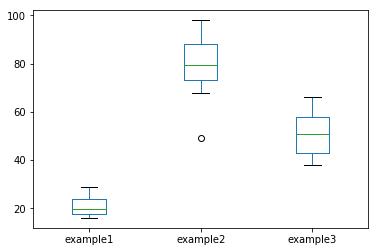

In [13]:
# Let's draw a box plot and see what the data looks like.
# We first need to import the matplotlib library and call it inline
import matplotlib.pyplot as plt
%matplotlib inline

df.plot(kind="box")  # notice the one outlier in the column example2

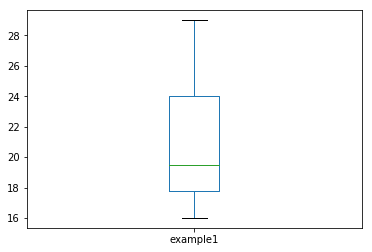

In [14]:
df['example1'].plot(kind="box")  # to plot just one column

In [15]:
# short cut to many of the above functions!
print df.describe()

       example1   example2   example3
count   8.00000   8.000000   8.000000
mean   20.87500  78.500000  51.125000
std     4.48609  15.445758  10.776131
min    16.00000  49.000000  38.000000
25%    17.75000  73.250000  42.750000
50%    19.50000  79.500000  51.000000
75%    24.00000  88.250000  58.000000
max    29.00000  98.000000  66.000000


In [16]:
# correlation between columns
df.corr()

,example1,example2,example3
example1,1.000000,0.477283,-0.123745
example2,0.477283,1.000000,-0.057076
example3,-0.123745,-0.057076,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11052f350>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x113d21c50>]], dtype=object)

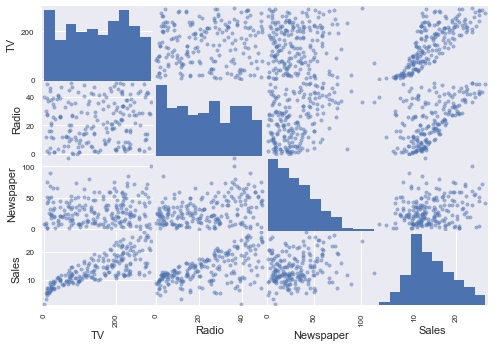

In [27]:
# Here is a graphical output to show correlational scatter plots
# Before we do that, let's get some better data to show the plots better.
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
pd.scatter_matrix(data)  # notice how the diagnoals contain histograms.

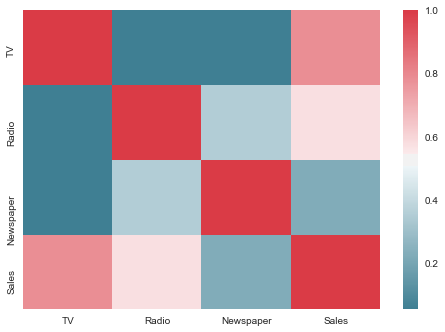

In [18]:
# Woah! Those plots are complicated to determine correlations. Can we have a better visualization?
# Yes! After all, good visualization is very important to convey results. Let's look at a heatmap for this.
# To use that, we will need another package, `seaborn`
import seaborn as sns
sns.heatmap(data.corr(), cmap=sns.diverging_palette(220, 10, as_cmap=True))  #cmap sets the color map to use

In [19]:
# Before we explore other measures of dispersion (skewness and kurtosis),
# let's load a dataset that can explain these concepts more clearly.
norm_data = np.random.normal(size=100000)
skewed_data = np.concatenate((np.random.normal(size=35000)+2, 
                             np.random.exponential(size=65000)), 
                             axis=0)
uniform_data = np.random.uniform(0,2, size=100000)
peaked_data = np.concatenate((np.random.exponential(size=50000),
                             np.random.exponential(size=50000)*(-1)),
                             axis=0)

data_df = pd.DataFrame({"norm":norm_data,
                       "skewed":skewed_data,
                       "uniform":uniform_data,
                       "peaked":peaked_data})

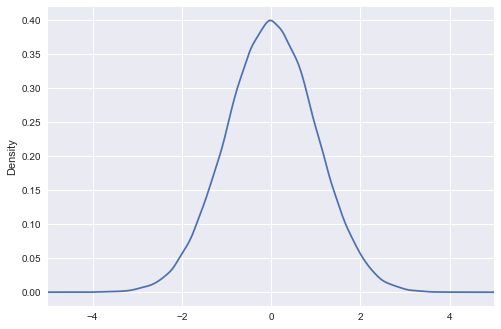

In [20]:
# Let's have a look at their probability densities
data_df["norm"].plot(kind="density", xlim=(-5,5))

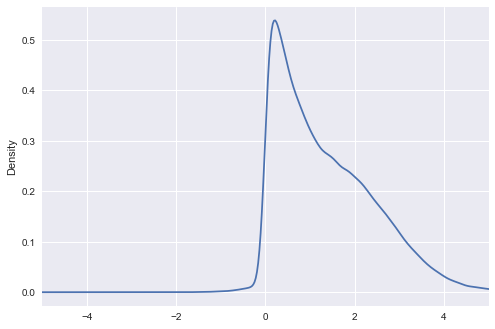

In [21]:
data_df["skewed"].plot(kind="density", xlim=(-5,5))

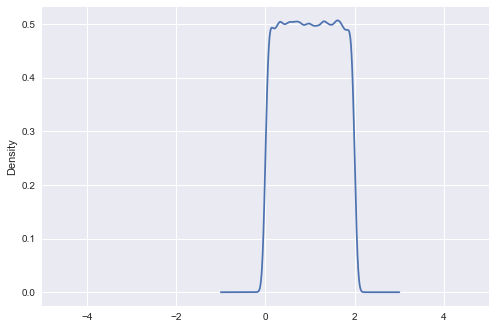

In [22]:
data_df["uniform"].plot(kind="density", xlim=(-5,5))

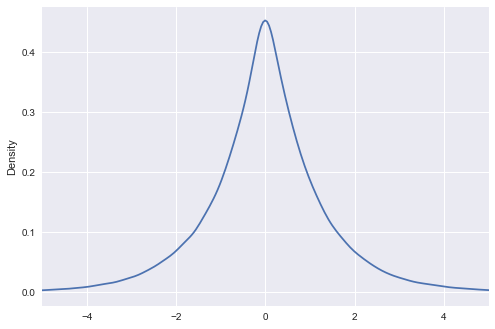

In [23]:
data_df["peaked"].plot(kind="density", xlim=(-5,5))

In [25]:
#Now, let's look at skewness and kurtosis for these distributions
print data_df.skew()  # skew
print data_df.kurt()  # kurtosis

norm      -0.007127
peaked     0.019226
skewed     1.014525
uniform    0.001749
dtype: float64
norm       0.009963
peaked     2.888525
skewed     1.317572
uniform   -1.197782
dtype: float64


## Additional Plotting Resources

An exhaustive list of Pandas visualization (using matplotlib) can be found at the [Pandas Visualization page](http://pandas.pydata.org/pandas-docs/stable/visualization.html)

Also, check out the [Data Visualization Lab](./data-visualization-lab.ipynb) from one of our lessons.

## Working with categorical data

In [30]:
# Let's get back our advertising data and add a categorical variable to it, which can take two values.
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
# set a seed for reproducibility
np.random.seed(12345)
# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(data))
mask_large = nums > 0.5
# initially set Size to small, then change roughly half to be large
data['Size'] = 'small'
data.loc[mask_large, 'Size'] = 'large'
print data.head()

      TV  Radio  Newspaper  Sales   Size
1  230.1   37.8       69.2   22.1  large
2   44.5   39.3       45.1   10.4  small
3   17.2   45.9       69.3    9.3  small
4  151.5   41.3       58.5   18.5  small
5  180.8   10.8       58.4   12.9  large


In [31]:
# For scikit-learn, which we will use to build some models, data has to be numerical.
# So we will convert the `Size` column to be numerical by using the function map().
# create a new Series called IsLarge
data['IsLarge'] = data.Size.map({'small':0, 'large':1})
print data.head()

      TV  Radio  Newspaper  Sales   Size  IsLarge
1  230.1   37.8       69.2   22.1  large        1
2   44.5   39.3       45.1   10.4  small        0
3   17.2   45.9       69.3    9.3  small        0
4  151.5   41.3       58.5   18.5  small        0
5  180.8   10.8       58.4   12.9  large        1


In [33]:
# What if the categorical variable can take more than two variables?
# We use the get_dummies() method.
# Adding the extra categorical variable
np.random.seed(123456)
# assign roughly one third of observations to each group
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
data['Area'] = 'rural'
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'
print data.head()
# using get_dummies() to create the necessary n-1 columns
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(data.Area, prefix='Area').iloc[:, 1:]
# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, area_dummies], axis=1)
print data.head()

      TV  Radio  Newspaper  Sales   Size  IsLarge      Area
1  230.1   37.8       69.2   22.1  large        1     rural
2   44.5   39.3       45.1   10.4  small        0     urban
3   17.2   45.9       69.3    9.3  small        0     rural
4  151.5   41.3       58.5   18.5  small        0     urban
5  180.8   10.8       58.4   12.9  large        1  suburban
      TV  Radio  Newspaper  Sales   Size  IsLarge      Area  Area_suburban  \
1  230.1   37.8       69.2   22.1  large        1     rural              0   
2   44.5   39.3       45.1   10.4  small        0     urban              0   
3   17.2   45.9       69.3    9.3  small        0     rural              0   
4  151.5   41.3       58.5   18.5  small        0     urban              0   
5  180.8   10.8       58.4   12.9  large        1  suburban              1   

   Area_urban  
1           0  
2           1  
3           0  
4           1  
5           0  


# Central Limit Theorem

We assume normal distributions in a lot of model building. This makes sense due to the Central Limit Thoerem. To read up more about it, check out the [Central Limit Theorem notebook](./central-limit-theorem.ipynb).

# Building a Model

## Hypothesis Testing

We will test hypothesis testing as it relates to linear modeling. We'll dive into how to do linear regression models in later classes. To do this, we will use the `statsmodels` package. Details about the package can be found on the [documentation page](http://www.statsmodels.org/stable/index.html)

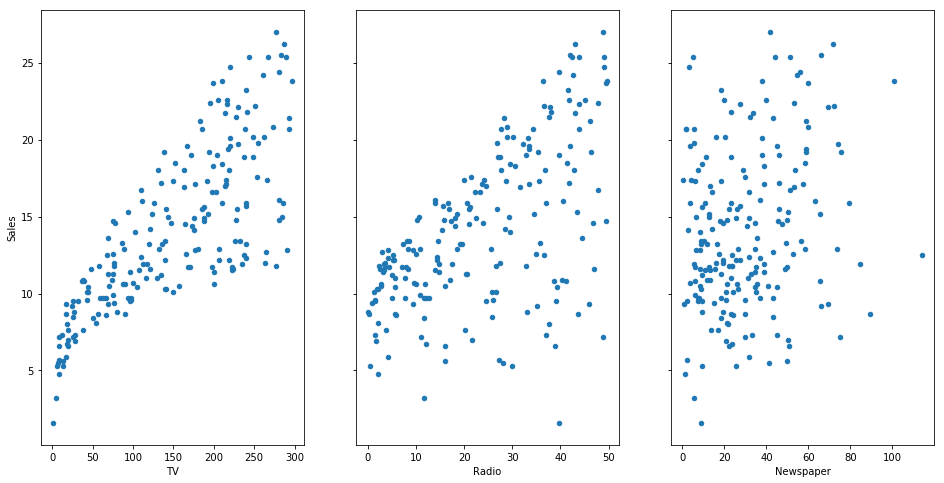

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
# this allows plots to appear directly in the notebook
%matplotlib inline

# let's start with our advertising data.
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

# another way to visualize the scatter plots. This time, we will display on the same plot.
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

Let's use `Statsmodels` to estimate the associations between advertising efforts and sales. 

In [2]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
# formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
# with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm = smf.ols(formula='Sales ~ TV', data=data).fit()

#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 21 May 2017   Prob (F-statistic):           1.47e-42
Time:                        21:25:40   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000         6.130     7.935
TV             0.0475      0.003     17.668      0.000         0.042     0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3]:
# print the coefficients
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

## Interpreting Model Coefficients

How do we interpret the TV coefficient ($\beta_1$)?
- A "unit" increase in TV ad spending is **associated with** a 0.047537 "unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads is **associated with** an increase in sales of 47.537 widgets.

Note that if an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

## Using the Model for Prediction

Let's say that there was a new market where the TV advertising spend was **$50,000**. What would we predict for the Sales in that market?

$$y = \beta_0 + \beta_1x$$
$$y = 7.032594 + 0.047537 \times 50000$$

In [45]:
# manually calculate the prediction
7.032594 + 0.047537*50000

2383.882594

Thus, we would predict Sales of **2,383 widgets** in that market.

Of course, we can also use Statsmodels to make the prediction:

In [46]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [50000]})
X_new.head()

,TV
0,50000


In [47]:
# use the model to make predictions on a new value
lm.predict(X_new)  # same value as before!

array([ 2383.8646152])

In [48]:
# determine confidence in our model
print lm.pvalues
print lm.conf_int()

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64
                  0         1
Intercept  6.129719  7.935468
TV         0.042231  0.052843


## Statistical Tests

There are a few good statistical tests for A/B testing:
* [ANOVA](https://en.wikipedia.org/wiki/Analysis_of_variance)
* [Welch's t-test](https://en.wikipedia.org/wiki/Welch's_t-test)
* [Mann-Whitney test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test)

Each test makes various assumptions:
* ANOVA assumes normal distributions and equal variances in the two data sets
* The Welch t-test assumes normal distributions but not necessarily equal variances, and accounts for small sample sizes better
* The Mann-Whitney test assumes nothing about the distributions but requires at least 20 data points in each set, and produces a weaker p-value

Typically you need to choose the most appropriate test. Tests that make more assumptions are more discriminating (stronger p-values) but can be misleading on data sets that don't satisfy the assumptions.

All of these tests are available in the `scipy` library, a stats library for python:
* [ANOVA](http://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.stats.f_oneway.html)
* [Welch's t-test](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [Mann-Whitney](http://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.stats.mannwhitneyu.html)

#For example, to use ANOVA

`statistic, pvalue = stats.f_oneway(df["A"], df["B"])`

`print pvalue`

# Regression

Regression is used to analyze and/or predict continuous outcome variables. In Python, this can be done using the `sklearn` (scikit-learn) or `statsmodels` package. Here we look at both approaches.


Before we do that, though, it will be useful to outline the steps to follow in a regression problem.

### Regression Workflow

**Step 0** Conduct exploratory data analysis to identify missing data, outliers, truncation, data censoring etc. using visual and descriptive statistics (refer to the sections above). Determine how to handle missing data and outliers. Remember that outliers should not be removed unless there is a non-statistical reason for doing so.

**Step 1** Adjust variables for abnormally large or small ranges compared to other variables if needed using quadratic, cubic, logarithmic transform etc. This can also be done at the end in the formula when passing the variables in the model formulation step. Adjust variables for centering and scaling if desired to have interpretable coefficients. Functions that can be used to visualize these issues include `sns.lmplot` and `sns.pairplot`.

**Step 2** Plot the variables against one another to identify relationships (correlations between independent and dependent variables are good; correlations between independent variables is not good - multicollinearity). Functions that can be used here include `sns.pairplot`.

**Step 3** Address multicollinearity betweeen independent variables by excluding some of the variables or determining to use regularization methods such as LASSO, Ridge or Elastic Net.

**Step 4** Convert categorical variables to discrete variables. Functions that can be used here include `pd.get_dummies` (important: note its `prefix` option - very handy!). Remember to remove one of the generated columns (values of the variable) to avoid potential multicollinearity issues!

**Step 5** Prepare the data to build the model. If using `statsmodels`, remember that the intercept has to be passed explicitly. This can be done using `np.vander(X, 2)` or `sm.add_constant(X)`. This is not needed when using the `sklearn` functions.

**Step 6** Use the model building functions in `statsmodels` or `sklearn` to build the desired model. Functions include `sm.OLS` or `smf.OLS` in `statsmodels` and `linear_model.LinearRegression()`. Note that `sm` is used to pass the model data as variables and `smf` is used to pass the model data as a formula.

**Step 7** Analyze the model results - adjusted R-squared, p-values and mean squared error. Also, look out for anomalous values of coefficients. Determine whether model assumptions (normality, homoscedasticity, independence) have been met. Functions to perform this include `.fit()` followed by `.summary()` in `statsmodels` models. In the `sklearn` package, it is a bit more complicated. Functions include `pvalues = feature_selection.f_regression(X, y)`, `residuals = (y-algo.predict(X)).values`, `coefficients = algo.coef_`, `y-intercept = algo.intercept_`, `r-squared = algo.score(X,y)`.

**Step 8** Determine whether the model is a good one or needs to be improved upon by regularization, cross-validation methods. Functions to do this include `sklearn` package's `cross_validation.KFold` for cross-validation, and `Lasso()`, `Ridge()`, `ElasticNet()` for regularization.

**Step 8** Alternatively, build the model using gradient descent and grid search to work quickly with large amounts of data and complex models. Functions to do this include `SGDRegressor()` and `grid_search.GridSearchCV()` in `sklearn` package.

### Regression model examples

Check worked out linear regression examples using both `sklearn` and `statsmodels` package in the [Linear Regression notebook](./linear-regression.ipynb).

### Regularization

Regularization is used to trade-off bias error for generalized error. Essentially, adding regularization to a model helps reduce the degree of overfitting by forcing the model to be simpler.

This can be done in many different ways. Two popular ways to do it are L1 and L2 regularization. Lasso (or LASSO) Regression uses the L1 penalty function and Ridge Regression uses L2 regularization. Elastic Net uses a combination of the two.

Lasso regression forces coefficients to actually become zero. Consequently, it is preferred in situations where there are many features, to reduce the number of features used in the model. Ridge regression reduces the values of the coefficients. Consequently, it builds models where the outcome variables does not depend too heavily on some of the feature variables.

It is important from the above discussion to note that Lasso regression does feature selection as well as parameter (coefficient) shrinkage (reduction), whereas Ridge regression only does parameter shrinkage. For high-dimensional problems, therefore, Lasso is preferred.

All three regularization techniques can be  performed using the `sklearn` package. For a demonstration of these and other regularization techniques, check out the [Regularization notebook](./regularization.ipynb).